In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 9
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 1.0
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[9_10_51_300_1.0_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[9_10_51_300_1.0_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	955.9431

Best Fitness:	926.2691
Solution:	900.0000
Diff:		26.2691

[0:12:52][----------] 1.96% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	962.9746

Best Fitness:	938.0036
Solution:	900.0000
Diff:		38.0036

[0:25:12][----------] 3.92% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	964.1433

Best Fitness:	933.7277
Solution:	900.0000
Diff:		33.7277

[0:37:11][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	954.1581

Best Fitness:	921.9803
Solution:	900.0000
Diff:		21.9803

[0:47:31][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	960.0086

Best Fitness:	936.1647
Solution:	900.0000
Diff:		36.1647

[0:57:50][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	927.4390

Best Fitness:	915.0432
Solution:	900.0000
Diff:		15.0432

[1:08:05][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	957.1163

Best Fitness:	925.0258
Solution:	900.0000
Diff:		25.0258

[1:18:29][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	952.6564

Best Fitness:	926.0713
Solution:	900.0000
Diff:		26.0713

[1:28:55][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	957.0446

Best Fitness:	926.4570
Solution:	900.0000
Diff:		26.4570

[1:38:43][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	953.5167

Best Fitness:	928.1832
Solution:	900.0000
Diff:		28.1832

[1:47:43][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	957.5255

Best Fitness:	933.8354
Solution:	900.0000
Diff:		33.8354

[1:56:38][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	955.2528

Best Fitness:	926.1222
Solution:	900.0000
Diff:		26.1222

[2:05:53][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	951.3011

Best Fitness:	931.0517
Solution:	900.0000
Diff:		31.0517

[2:14:46][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	951.6738

Best Fitness:	929.6382
Solution:	900.0000
Diff:		29.6382

[2:23:24][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	955.5480

Best Fitness:	926.9183
Solution:	900.0000
Diff:		26.9183

[2:31:08][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	958.2434

Best Fitness:	939.7824
Solution:	900.0000
Diff:		39.7824

[2:39:06][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	955.8604

Best Fitness:	922.4784
Solution:	900.0000
Diff:		22.4784

[2:46:54][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	959.0288

Best Fitness:	930.8261
Solution:	900.0000
Diff:		30.8261

[2:54:45][####------] 35.29% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	951.7705

Best Fitness:	925.8448
Solution:	900.0000
Diff:		25.8448

[3:02:22][####------] 37.25% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	950.2856

Best Fitness:	926.7418
Solution:	900.0000
Diff:		26.7418

[3:09:17][####------] 39.22% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	955.6578

Best Fitness:	928.4145
Solution:	900.0000
Diff:		28.4145

[3:15:52][####------] 41.18% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	961.0476

Best Fitness:	933.0650
Solution:	900.0000
Diff:		33.0650

[3:22:24][####------] 43.14% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	959.7048

Best Fitness:	930.5542
Solution:	900.0000
Diff:		30.5542

[3:28:56][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	953.4130

Best Fitness:	927.3977
Solution:	900.0000
Diff:		27.3977

[3:35:25][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	955.3060

Best Fitness:	925.7023
Solution:	900.0000
Diff:		25.7023

[3:41:27][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	956.1531

Best Fitness:	932.3805
Solution:	900.0000
Diff:		32.3805

[3:47:01][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	959.1466

Best Fitness:	931.7335
Solution:	900.0000
Diff:		31.7335

[3:52:25][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	960.2864

Best Fitness:	923.9960
Solution:	900.0000
Diff:		23.9960

[3:57:46][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	910.9644

Best Fitness:	910.9494
Solution:	900.0000
Diff:		10.9494

[4:03:11][######----] 56.86% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	953.6737

Best Fitness:	931.1864
Solution:	900.0000
Diff:		31.1864

[4:08:32][######----] 58.82% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	956.8128

Best Fitness:	932.9088
Solution:	900.0000
Diff:		32.9088

[4:12:54][######----] 60.78% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	958.0001

Best Fitness:	930.1707
Solution:	900.0000
Diff:		30.1707

[4:17:17][######----] 62.75% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	954.3352

Best Fitness:	918.7301
Solution:	900.0000
Diff:		18.7301

[4:21:35][######----] 64.71% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	955.1194

Best Fitness:	929.3738
Solution:	900.0000
Diff:		29.3738

[4:25:53][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	958.0072

Best Fitness:	925.4173
Solution:	900.0000
Diff:		25.4173

[4:30:12][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	958.6906

Best Fitness:	929.2740
Solution:	900.0000
Diff:		29.2740

[4:33:55][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	957.5892

Best Fitness:	930.7243
Solution:	900.0000
Diff:		30.7243

[4:37:17][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	963.0193

Best Fitness:	937.1647
Solution:	900.0000
Diff:		37.1647

[4:40:42][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	960.1024

Best Fitness:	936.3110
Solution:	900.0000
Diff:		36.3110

[4:44:05][########--] 76.47% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	957.9666

Best Fitness:	923.3993
Solution:	900.0000
Diff:		23.3993

[4:47:26][########--] 78.43% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	958.3252

Best Fitness:	935.3940
Solution:	900.0000
Diff:		35.3940

[4:50:34][########--] 80.39% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	951.6709

Best Fitness:	923.1667
Solution:	900.0000
Diff:		23.1667

[4:53:16][########--] 82.35% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	954.9670

Best Fitness:	932.9456
Solution:	900.0000
Diff:		32.9456

[4:55:56][########--] 84.31% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	961.7959

Best Fitness:	933.5243
Solution:	900.0000
Diff:		33.5243

[4:58:36][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	955.8945

Best Fitness:	926.2960
Solution:	900.0000
Diff:		26.2960

[5:01:16][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	954.0704

Best Fitness:	928.7034
Solution:	900.0000
Diff:		28.7034

[5:03:50][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	957.1083

Best Fitness:	921.9464
Solution:	900.0000
Diff:		21.9464

[5:06:07][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	949.6471

Best Fitness:	918.1439
Solution:	900.0000
Diff:		18.1439

[5:08:24][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	959.8738

Best Fitness:	930.0828
Solution:	900.0000
Diff:		30.0828

[5:10:41][##########] 96.08% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	954.2102

Best Fitness:	919.3849
Solution:	900.0000
Diff:		19.3849

[5:12:58][##########] 98.04% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	959.9297

Best Fitness:	932.5032
Solution:	900.0000
Diff:		32.5032

[5:15:21][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

5:15:21

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
326,65.663971,56.587136,64.600645,72.457799,57.480378,65.653238,54.731633,66.925585,62.608087,71.627926,...,49.863835,60.469661,48.754927,63.762543,54.776605,42.056191,66.750498,66.239062,61.390549,50
327,65.663971,56.587136,64.600645,72.457799,57.480378,65.653238,54.731633,66.925585,62.608087,71.627926,...,49.863835,60.469661,48.754927,63.762543,54.776605,42.056191,66.750498,66.239062,61.390549,50
328,65.663971,56.587136,64.600645,72.457799,57.480378,65.653238,54.731633,66.925585,62.608087,71.627926,...,49.863835,60.469661,48.754927,63.762543,54.776605,42.056191,66.750498,66.239062,61.390549,50
329,65.663971,56.587136,64.600645,72.457799,57.480378,65.653238,54.731633,66.925585,62.608087,71.627926,...,49.863835,60.469661,48.754927,63.762543,54.776605,42.056191,66.750498,66.239062,61.390549,50
330,65.663971,56.587136,64.600645,72.457799,57.480378,65.653238,54.731633,66.925585,62.608087,71.627926,...,49.863835,60.469661,48.754927,63.762543,54.776605,42.056191,66.750498,66.239062,61.390549,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 26.269081266464923

Best error for run 1: 38.00357762663532

Best error for run 2: 33.72770854939574

Best error for run 3: 21.98028912892005

Best error for run 4: 36.16469100132042

Best error for run 5: 15.043217116807455

Best error for run 6: 25.025770394247616

Best error for run 7: 26.071301574349036

Best error for run 8: 26.456967777109412

Best error for run 9: 28.183203382113334

Best error for run 10: 33.835410077063784

Best error for run 11: 26.122168070872135

Best error for run 12: 31.05166680579157

Best error for run 13: 29.63823964153653

Best error for run 14: 26.918316522928535

Best error for run 15: 39.78244057950644

Best error for run 16: 22.478372726331486

Best error for run 17: 30.82610128415945

Best error for run 18: 25.844842099601465

Best error for run 19: 26.7417732919605

Best error for run 20: 28.41447063127748

Best error for run 21: 33.065016860864716

Best error for run 22: 30.554217888736957

Best error for run 23: 27.397674405514863

Best error for run 24: 25.70229796889498

Best error for run 25: 32.380511060161666

Best error for run 26: 31.73347667213568

Best error for run 27: 23.99604623222035

Best error for run 28: 10.94935958551116

Best error for run 29: 31.186420499071232

Best error for run 30: 32.908783513318554

Best error for run 31: 30.17070420487346

Best error for run 32: 18.730056648753703

Best error for run 33: 29.373764066509693

Best error for run 34: 25.41733279653488

Best error for run 35: 29.273992042078135

Best error for run 36: 30.724295146409645

Best error for run 37: 37.16467949434252

Best error for run 38: 36.311008596790316

Best error for run 39: 23.39933225779896

Best error for run 40: 35.39404841198029

Best error for run 41: 23.166747354265

Best error for run 42: 32.945621148054784

Best error for run 43: 33.52428487532575

Best error for run 44: 26.29602811768143

Best error for run 45: 28.70344101415924

Best error for run 46: 21.94639061559417

Best error for run 47: 18.143890739119115

Best error for run 48: 30.082806946917458

Best error for run 49: 19.384910091681718

Best error for run 50: 32.503232196994986

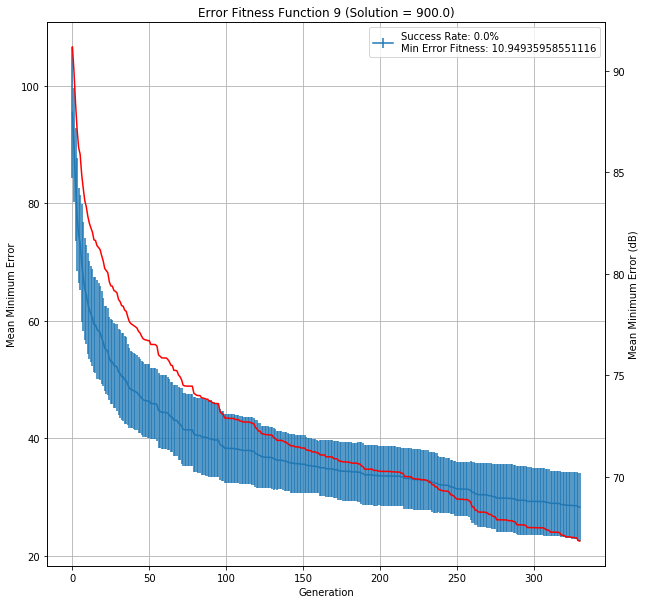

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[9_10_51_300_1.0_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,9,10,1.0,26.269081,38.003578,33.727709,21.980289,36.164691,15.043217,...,26.296028,28.703441,21.946391,18.143891,30.082807,19.38491,32.503232,28.257058,5:15:21,99900
